<h1 sytle="float:right">                                         TaskRabbit Dataset Analysis 

In [2]:
import pandas as pd
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')
df = pd.read_csv("sample.csv")
df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009185352,1,38,151,0,Furniture Assembly
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1006892359,2,40,193,0,Furniture Assembly
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1012023956,3,28,0,0,Furniture Assembly
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009733517,4,43,303,0,Furniture Assembly
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1013579273,5,29,39,0,Furniture Assembly


### <font color='red'> 1. How many recommendation sets are in this data sample? </font>
&nbsp;&nbsp;&nbsp;&nbsp;**2100**

In [3]:
len(df.recommendation_id.unique())

2100

### <font color='red'> 2. Each recommendation set shows from 1 to 15 Taskers, what is:</font>
### &nbsp;&nbsp;&nbsp;&nbsp;<font color='red'>     - average number of Taskers shown : </font> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **14.28**
### &nbsp;&nbsp;&nbsp;&nbsp;<font color='red'>    - median  number of Taskers shown  : </font>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **15.00**

In [4]:
df2 = df.groupby('recommendation_id')['position'].count().reset_index() \
        .rename(columns={'recommendation_id': 'recommendation_id', 'position': 'no_of_taskers'})
print("mean of taskers per recommendation set")
display(df2['no_of_taskers'].mean()) #mean
print("median of taskers per recommendation set")
display(df2['no_of_taskers'].median()) #median

mean of taskers per recommendation set


14.285714285714286

median of taskers per recommendation set


15.0

### <font color="red"> 3. How many total unique Taskers are there in this data sample? </font> 
&nbsp;&nbsp;&nbsp;&nbsp;**830**

In [5]:
len(df.tasker_id.unique())

830

### <font color='red'> 4. Which Tasker has been shown the most? </font> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** Tasker with id 1014508755  with 608 times**
### &nbsp;&nbsp;&nbsp;<font color='red'> Which Tasker has been shown the least? </font> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**There are 68 taskers who showed up a minimum of 1 time**

In [6]:
df3 = df.groupby('tasker_id')['recommendation_id'].count().reset_index() \
        .rename(columns={'tasker_id': 'tasker_id', 'recommendation_id': 'no_of_times_shown'})
print("taskers who are shown maximum number of times")
display(df3[df3['no_of_times_shown'] == df3['no_of_times_shown'].max()])
print("taskers who are shown minimum number of times")
display(df3[df3['no_of_times_shown'] == df3['no_of_times_shown'].min()])

taskers who are shown maximum number of times


,tasker_id,no_of_times_shown
780,1014508755,608


taskers who are shown minimum number of times


,tasker_id,no_of_times_shown
3,1006690425,1
12,1006853970,1
14,1006899551,1
31,1007246122,1
34,1007295623,1
42,1007383273,1
46,1007472083,1
49,1007480912,1
63,1007638825,1
85,1007923586,1


### <font color='red'>5. Which Tasker has been hired the most?</font> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Tasker 1012043028 was hired 59 times which is highest** 
### <font color='red'>&nbsp;&nbsp;&nbsp;&nbsp;Which Tasker has been hired the least?</font> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**There are 518 taskers who are hired 0 times. List is below**

In [7]:
df4 = df.groupby('tasker_id')['hired'].sum().reset_index() \
        .rename(columns={'tasker_id': 'tasker_id', 'hired': 'no_of_times_hired'})
print("taskers who are hired minimum number of times")
display(df4[df4['no_of_times_hired'] == df4['no_of_times_hired'].max()])## Max hired
print("taskers who are hired minimum number of times")
display(df4[df4['no_of_times_hired'] == df4['no_of_times_hired'].min()]) ## Min hired

taskers who are hired minimum number of times


,tasker_id,no_of_times_hired
502,1012043028,59


taskers who are hired minimum number of times


,tasker_id,no_of_times_hired
0,1006646767,0
2,1006655883,0
3,1006690425,0
4,1006702141,0
7,1006720473,0
8,1006751673,0
9,1006771484,0
10,1006797028,0
11,1006808958,0
12,1006853970,0


### <font color='red'>6. If we define the "Tasker conversion rate" as the number of times a Tasker has been hired, out of the number of times the Tasker has been shown, how many Taskers have a conversion rate of 100% </font>
&nbsp;&nbsp;&nbsp;**There are 6 taskers who had 100 % conversion rate**

In [8]:
df5 = pd.merge(df3, df4, on='tasker_id', how='inner')
df5['conversion_rate'] = df5['no_of_times_hired']*100/df5['no_of_times_shown']
df5[df5['conversion_rate']==100]

,tasker_id,no_of_times_shown,no_of_times_hired,conversion_rate
49,1007480912,1,1,100.0
110,1008094420,2,2,100.0
175,1008861741,9,9,100.0
486,1011985968,1,1,100.0
553,1012369686,2,2,100.0
775,1014478773,1,1,100.0


<strong>
### <font color='red'>7. Would it be possible for all Taskers to have a conversion rate of 100%. Please explain your reasoning.</font>
For every recommendation_id, the company is showing on an average 15 taskers out of which only one person is hired. So the probability of hiring of a person for single recommendation is just 1/15. Since only one tasker is hired for every recommendation id, the remaining 14 taskers did not get hired atleast one time they showed which counters the possibility of conversion rate of 100 as we have found atleast one tasker who cannot have 100 % conversion rate. This means we cannot have 100% conversion rate for all the taskers.
<br><br/>
From the above table we see that all the taskers who have lesser number of appearences have 100 % conversion rate. Which means as the number of times he is shown is less , more the conversion rate of tasker even if he is hired lesser number of times. 
<br><br/>
Also, From the above results, some of the recommendations were having 0 hiring.The only way to get 100 % conversion rate is to show single tasker for each recommendation and have him hired. But this adversely affects the business as the clients would have lesser oppurtunities to chose and the taskers would believe they are getting less opportunities. 
<br><br/>
There is a intermediate option of reducing the number of recommendations for each task a little low to 10 which would increase the probability of hiring from 1/15 to 1/10 but this needs to be considered only if does not impact the business negatively. 

In [9]:
df6 = df.groupby('recommendation_id')['hired'].sum().reset_index().reset_index() \
        .rename(columns={'recommendation_id': 'recommendation_id', 'hired': 'hired_not_hired'})
df6.head()

,index,recommendation_id,hired_not_hired
0,0,0-0-00033225-3f89-47dd-b4f1-5d1feb359a76,1
1,1,0-0-000ea7f0-2ad9-48ee-bc79-899ee439be82,1
2,2,0-0-0027ac52-1983-4130-8a65-5048dda560c9,1
3,3,0-0-003a3672-3c80-4134-b409-b80baee0e082,1
4,4,0-0-0045d200-f7c0-4fe6-94df-b89a4cde3ee7,1


In [10]:
df6[df6['hired_not_hired'] ==0].count()

index                395
recommendation_id    395
hired_not_hired      395
dtype: int64

### <font color='red'>8. For each category, what is the average position of the Tasker who is hired? </font>
### <font color='red'> 9. For each category, what is the average hourly rate and average number of completed tasks for the Taskers who are hired?

In [11]:
df7 = df[df['hired'] ==1]
print("Please see the table below for answers")
display(df7.groupby('category')['position','hourly_rate','num_completed_tasks'].mean().reset_index() \
    .rename(columns={'category': 'category', 'position': 'average_position','hourly_rate':'average_hourly_rate', \
                 'num_completed_tasks':'average_num_completed_tasks'}))

Please see the table below for answers


,category,average_position,average_hourly_rate,average_num_completed_tasks
0,Furniture Assembly,3.611888,38.701049,249.020979
1,Mounting,4.596085,50.154804,284.096085
2,Moving Help,4.145359,63.012259,273.882662


<font color='red'>
### 10. Based on the previous, how would you approach the question of:
### &nbsp;&nbsp;&nbsp; How can we use market data to suggest hourly rates to Taskers that would maximize their opportunity to be hired? Please describe in detail, with code and formulas that support your model.

In [12]:
## Statistics of people who are not hired
df8 = df[df['hired'] ==0]
df8.groupby('category')['position','hourly_rate','num_completed_tasks'].agg({'median','mean','min','max'}).reset_index() \
.rename(columns={'category': 'category', 'position': 'position_stats_not_hired', \
                    'hourly_rate':'hourly_rate_stats_not_hired',  'num_completed_tasks':'num_completed_tasks_stats_not_hired'})


category position_stats_not_hired                       \
                                           min max      mean median   
0  Furniture Assembly                        1  15  8.139054      8   
1            Mounting                        1  15  8.065586      8   
2         Moving Help                        1  15  8.095662      8   

  hourly_rate_stats_not_hired                         \
                          min  max       mean median   
0                          19  290  39.463301     38   
1                          18  120  50.493961     50   
2                          18  250  83.736345     65   

  num_completed_tasks_stats_not_hired                           
                                  min   max        mean median  
0                                   0  1396  182.000212     74  
1                                   0  1406  216.470227    118  
2                                   0  1243  256.616608    144

In [13]:
#Statistics of people who are hired
df7 = df[df['hired'] ==1]
df7.groupby('category')['position','hourly_rate','num_completed_tasks'].agg({'median','mean','min','max'}).reset_index() \
    .rename(columns={'category': 'category', 'position': 'position_stats_hired','hourly_rate':'hourly_rate_stats_hired', \
                 'num_completed_tasks':'num_completed_tasks_stats_hired'})


category position_stats_hired                       \
                                       min max      mean median   
0  Furniture Assembly                    1  15  3.611888      2   
1            Mounting                    1  15  4.596085      3   
2         Moving Help                    1  15  4.145359      3   

  hourly_rate_stats_hired                         \
                      min  max       mean median   
0                      22  180  38.701049     38   
1                      26   95  50.154804     50   
2                      18  190  63.012259     49   

  num_completed_tasks_stats_hired                           
                              min   max        mean median  
0                               0   988  249.020979  131.5  
1                               0  1397  284.096085  190.0  
2                               0  1178  273.882662  147.0

In [14]:
#Overall statistics on the entire dataset
df.groupby('category')['position','hourly_rate','num_completed_tasks'].agg({'median','mean','min','max'}).reset_index() \
    .rename(columns={'category': 'category', 'position': 'position_stats_overall','hourly_rate':'hourly_rate_stats_overall', \
                 'num_completed_tasks':'num_completed_tasks_stats_overall'})

category position_stats_overall                     \
                                         min max    mean median   
0  Furniture Assembly                      1  15  7.8801      8   
1            Mounting                      1  15  7.8706      8   
2         Moving Help                      1  15  7.8701      8   

  hourly_rate_stats_overall                       \
                        min  max     mean median   
0                        19  290  39.4197     38   
1                        18  120  50.4749     50   
2                        18  250  82.5530     65   

  num_completed_tasks_stats_overall                         
                                min   max      mean median  
0                                 0  1396  185.8338     75  
1                                 0  1406  220.2708    121  
2                                 0  1243  257.6025    144

<strong>
<ul>
<li>
From the above tables we see a clear difference in the position of people who are hired. They are having a mean in the range of 3-5 while the non-hired people have a mean around 8</li>
<li>
Also if we see the average hourly rate of hired vs non-hired vs overall dataset, they almost reamin the same.Also people who are hired are having higher average of previous number of tasks than non-hired </li>
<li>
From this we can consider that position would surely affect the probability of getting hired , but the hourly rate and number of previously completed tasks also should be considered. Generally clients prefer the ones with lesser hourly rate and higher number of previous tasks completed in the same category</li>
<li>
The probability of hiring is inversely proportional to position and hourly rate and directly proportional to number of previously completed tasks </li>
<li>
With this in mind, since we are handling a case of probabiltiy of hiring which is a binomial distribution, we can model this data with binomial logistic regression </li>

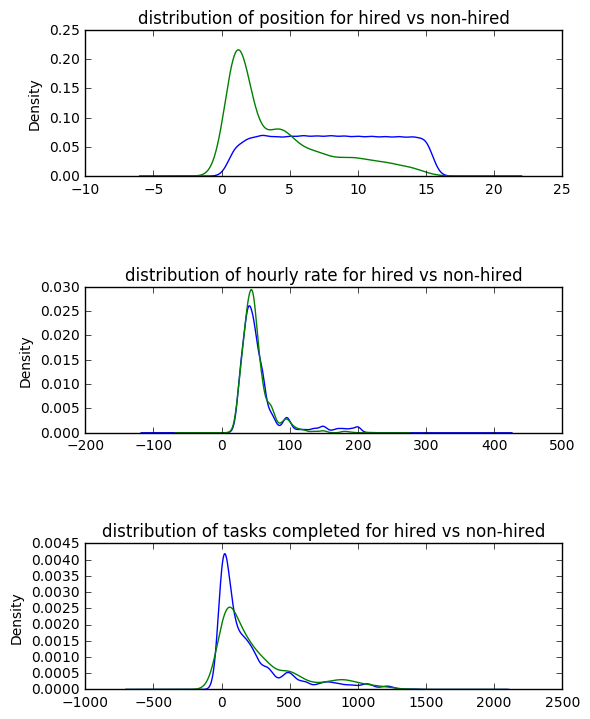

In [16]:
#Plott of distributions for hired vs non hired for all the variables
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3)
pc12 = df8['position'].plot(kind='density',ax = axes[0],title= "distribution of position for hired vs non-hired")
pc11 = df7['position'].plot(kind='density', ax = axes[0])
pc22 = df8['hourly_rate'].plot(kind='density',ax= axes[1],title= "distribution of hourly rate for hired vs non-hired")
pc21 = df7['hourly_rate'].plot(kind='density',ax = axes[1])
pc32 = df8['num_completed_tasks'].plot(kind='density', ax = axes[2],title= "distribution of tasks completed for hired vs non-hired")
pc31 = df7['num_completed_tasks'].plot(kind='density',ax = axes[2])
fig.tight_layout()

fig.set_figheight(8)
fig.set_figwidth(6)
plt.show()

<strong>
<ul>
<li>
Logistic regression model calculates the log of odds ratio which would make it easy for us to estimate the probability of change in success for change in the independant variable.
Formula we use for logistic regression is 
<br/>
   log(p/1-p) = a + b*position + c*hourly_rate + d*num_completed_tasks 
<br/>
<li>
Since logistic regression does not have assumptions of data normalization, preprocessing the data is not needed as of now</li>

In [17]:
## code for running logistic regression with the above forumula
import statsmodels.api as sm
X = df[['position','num_completed_tasks','hourly_rate']]
X['intercept'] = 1
Y = df[['hired']]
logit = sm.Logit(Y, X)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.190719
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  hired   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29996
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Nov 2017   Pseudo R-squ.:                  0.1258
Time:                        00:42:42   Log-Likelihood:                -5721.6
converged:                       True   LL-Null:                       -6544.9
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
position               -0.2656      0.008    -32.733      0.000        -0.281    -0.250
num_completed_tasks     0.0010      9e-05     11.338      0.000         0.001     0.001
hourly_rate            -0.0056      0.001     -5.180      0.000        -0.008    -0.003
intercept              -1.1885      0.064    -18.708      0.000        -1.313    -1.064
=======================================================================================
"""

<strong>
<ul>
<li>
All the three variables are significant in the model. Let us now consider the coefficients of model and find their impact on probability of getting hired.
</li>
<li>
Impact of position on probability of getting hired : 
</li>
(exp(intercept + coefficient_position*position_value) - exp(intercept + coefficient_position*position_value+1))*100/exp(intercept + coefficient_position*position_value+1) 
<br/>
&nbsp;We get this to be 34.82. This means that if the position value decreases by 1 keeping all the remaning variables constant, the probability of hiring goes up by 34.82 %
<li>
Impact of position on hourly rate of getting hired :
<br/>
(exp(intercept + coefficient_position*position_value) - exp(intercept + coefficient_position*position_value+5))*100/exp(intercept + coefficient_position*position_value+5) 
<br/>
&nbsp;We get this to be 4.86. This means that if the hourly rate decreases by 5$ keeping all the remaning variables constant, the probability of hiring goes up by 4.86 %
</li>
<li>
So the hourly price can be reduced slightly than the actual hourly rate of the person if as tasker's position is >5 to fancier the chances of tasker getting hired. If the tasker is in the top 5 positions, then you can go by suggesting the hourly rate of that person.
</li>